$$
\newcommand{\mat}[1]{\boldsymbol {#1}}
\newcommand{\mattr}[1]{\boldsymbol {#1}^\top}
\newcommand{\matinv}[1]{\boldsymbol {#1}^{-1}}
\newcommand{\vec}[1]{\boldsymbol {#1}}
\newcommand{\vectr}[1]{\boldsymbol {#1}^\top}
\newcommand{\rvar}[1]{\mathrm {#1}}
\newcommand{\rvec}[1]{\boldsymbol{\mathrm{#1}}}
\newcommand{\diag}{\mathop{\mathrm {diag}}}
\newcommand{\set}[1]{\mathbb {#1}}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\pderiv}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\bb}[1]{\boldsymbol{#1}}
$$
# Part 6: YOLO - Objects Detection
<a id=part6></a>

In this part we will use an object detection architecture called YOLO (You only look once) to detect objects in images. We'll use an already trained model weights (v5) found here: https://github.com/ultralytics/yolov5

In [1]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the YOLO model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")
model.to(device)
# Images
img1 = 'imgs/DolphinsInTheSky.jpg'  
img2 = 'imgs/cat-shiba-inu-2.jpg' 

Using cache found in /home/dansdeor/.cache/torch/hub/ultralytics_yolov5_master
requirements: Ultralytics requirement "gitpython>=3.1.30" not found, attempting AutoUpdate...
requirements: ❌ AutoUpdate skipped (offline)
YOLOv5 🚀 2023-6-3 Python-3.8.12 torch-1.10.1 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11019MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


## Inference with YOLO
<a id=part6_1></a>

You are provided with 2 images (img1 and img2).
**TODO**:
1. Detect objects using the YOLOv5 model for these 2 images.
2. Print the inference output with bounding boxes.
3. Calculate the number of pixels within a bounding box and the number in the background.
   
   **Hint**: Given you stored the model output in a varibale named 'results', you may find 'results.pandas().xyxy' helpful 
4. Look at the inference results and answer the question below.


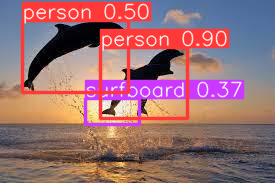

Image total pixel count:  50325
Object recognized as person have number of 6177 in its bounding box
Object recognized as person have number of 7632 in its bounding box
Object recognized as surfboard have number of 1404 in its bounding box
The total pixel count in all bounding boxes is:  13173
The pixel count in the background is:  37152


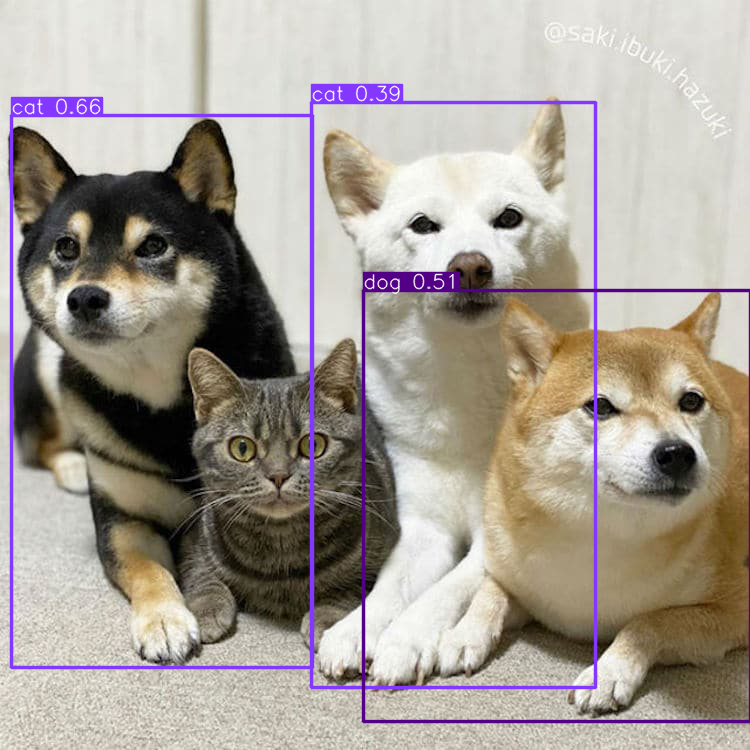

Image total pixel count:  562500
Object recognized as cat have number of 166152 in its bounding box
Object recognized as dog have number of 166797 in its bounding box
Object recognized as cat have number of 166140 in its bounding box
The total pixel count in all bounding boxes is:  406433
The pixel count in the background is:  156067


In [2]:
#Insert the inference code here.
import cv2
import pandas
import numpy as np
from cs236781.answers import display_answer
import hw2.answers

def print_inbox_background_pixels(data_frame: pandas.core.frame.DataFrame, image_shape):
    bit_map = np.ones((image_shape[1],image_shape[0]))
    print("Image total pixel count: ",image_shape[1] * image_shape[0])
    for _,f in data_frame.iterrows():
        bounding_box_pixel_count = (int(f['xmax'])-int(f['xmin']))*(int(f['ymax'])-int(f['ymin']))
        print("Object recognized as {} have number of {} in its bounding box".format(f['name'],bounding_box_pixel_count))
        # counting each pixel only once
        bit_map[int(f['xmin']):int(f['xmax']),int(f['ymin']):int(f['ymax'])] = 0
    print("The total pixel count in all bounding boxes is: ",np.count_nonzero(bit_map==0))
    print("The pixel count in the background is: ",np.count_nonzero(bit_map==1))

with torch.no_grad():
    for img in [img1,img2]:
        output = model(img)
        output.show()
        data_frame=output.pandas().xyxy[0]
        print_inbox_background_pixels(data_frame,cv2.imread(img).shape)


### Question 1

Analyze the inference results of the 2 images. 
1. How well did the model detect the objects in the pictures?
2. What can possibly be the reason for the model failures? suggest methods to resolve that issue.

In [3]:
display_answer(hw2.answers.part6_q1)



**Your answer:**
1. 

1. The model didn't detect the objects in the pictures very well. For the first image, the model detected two dolphins as a person and one dolphin as a surfboard. For the second image, two of the three dogs were recognized as cats, and the cat in the picture did not get recognized at all.

Even though the model is not good at classification, the regression capabilities of the model on the given 2 pictures is better in a way for most objects it successfully matches a bounding box for their size in the pictures.

2. \ Yolov5s is a smaller and lighter version of the YOLO model compared to its larger counterparts. With a smaller model size, Yolov5s may have limited capacity to capture complex patterns and details in the input data. The other possible reason is that the model training set was not diverse. The performance of any object detection model, including Yolov5s, heavily relies on the quality and diversity of the training dataset.


## Creative Detection Failures

<a id=part6_2></a>

Object detection pitfalls could be, for example: **occlusion** - when the objects are partially occlude, and thus missing important features, **model bias** - when a model learn some bias about an object, it could recognize it as something else in a different setup, and many others like **Deformation**, **Illumination conditions**, **Cluttered** or **textured background and blurring** due to moving objects.

**TODO**: Take pictures and that demonstrates 3 of the above object detection pitfalls, run inference and analyze the results.

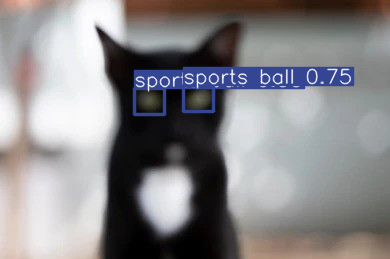

Image total pixel count:  101010
Object recognized as sports ball have number of 780 in its bounding box
Object recognized as sports ball have number of 780 in its bounding box
The total pixel count in all bounding boxes is:  1560
The pixel count in the background is:  99450


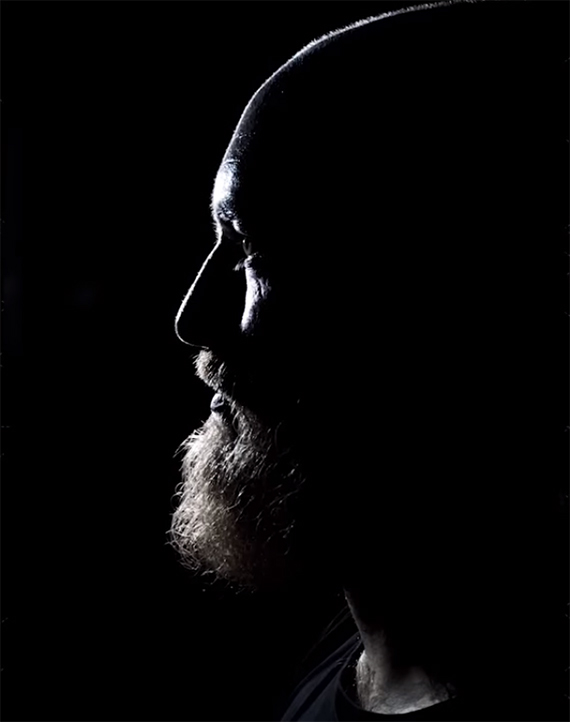

Image total pixel count:  411540
The total pixel count in all bounding boxes is:  0
The pixel count in the background is:  411540


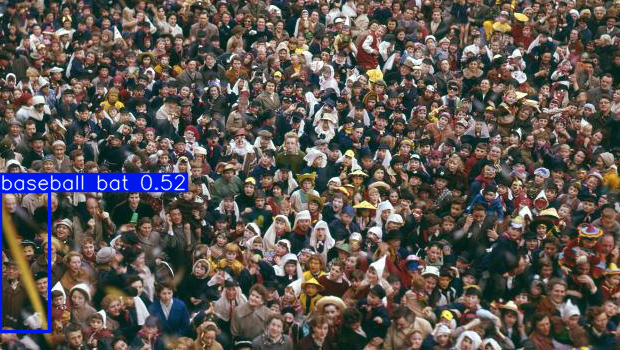

Image total pixel count:  217000
Object recognized as baseball bat have number of 6860 in its bounding box
The total pixel count in all bounding boxes is:  6860
The pixel count in the background is:  210140


In [4]:
# Insert the inference code here.
with torch.no_grad():
    for img in ["imgs/cat.jpg", "imgs/man.jpg", "imgs/crowd.jpg"]:
        output = model(img)
        output.show()
        data_frame = output.pandas().xyxy[0]
        print_inbox_background_pixels(data_frame, cv2.imread(img).shape)

### Question 3

Analyize the results of the inference. 
1. How well did the model detect the objects in the pictures? explain.


In [5]:
display_answer(hw2.answers.part6_q3)



**Your answer:**
3. We picked 3 different kinds of setups for object pitfalls: a blurred picture of a cat, a low light image of a person and a picture of a cluttered crowd of people. For the blurred cat picture, the model detected the cat's eyes as sports ball, which can seem like a tennis balls. The model didn't succeed in classifying the cat in the picture or even detect the object. For the dark image of the man, we had no success in detection of the object and for the picture of the crowd, the model detected a blurred line in the picture and classified it as a baseball bat, ignoring all the people in the picture. For the blurring effect, the reason for the bad performance is that the blurring deforms important features from the picture necessary for the model to figure out that there is a cat while making some cat's features like the eye similar to features of another class like a sport ball. The light illumination hides other features relevant for person localization and classification, like the shape of the head, leaving a small subset of features for the model to classify. The cluttering presents numerous distracting or similar-looking objects that add a lot of noise (especially by wearing hats and all kinds of accessories) and make the model struggle to differentiate between all the target objects.
